
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2024**

---

# Datos


En esta notebook, vamos a realizar una primera aproximación al conjunto de datos.

* Tipo de Datos
* Distribución de los datos

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url ='https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

In [ ]:
len(df)

5805

In [ ]:
df[:3]


,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,...,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis


In [ ]:
print(df.columns)

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to',
       '¿Tuviste actualizaciones de tus ingresos laborales durante 2023?',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT

# Análisis de salarios

Una primera pregunta que se nos puede ocurrir al ver esta encuenta es: **"¿Y cuánto cobran los programadores en Argentina?"**. (advertencia de sesgo!!! se nos pueden ocurrir muchas más! cuáles?)

Este será nuestro punto de partida para el análisis del conjunto de datos. El proceso total constará de varias iteraciones: a medida que se analicen los datos se descrubrirán otros aspectos relevantes, lo cual disparará nuevas preguntas.

Para conocer más sobre la distribución de los salarios, es necesario elegir una columna de la encuesta para analizar.

In [ ]:
salary_col = 'salary_monthly_NETO'

Exploremos la base en realación a estos datos. Una buena forma de comenzar una exploración es a través de la visualización. Seaborn nos provee un tipo de gráfico específico para graficar columnas que contienen números, llamado `displot`. (No confundir con `distplot`, que está deprecado).

El gráfico generado es un **histograma** de frecuencias. En el eje x se grafican los valores que toma la columna, divididos en intervalos o bins. En el eje y se grafica el conteo de ocurrencias de valores en cada intervalo.

Pueden ver algunas opciones de histograma [aquí ](https://python-charts.com/es/distribucion/histograma-seaborn/) y algunos colores para realzar sus gráficos [aquí](https://www.computerhope.com/htmcolor.htm)

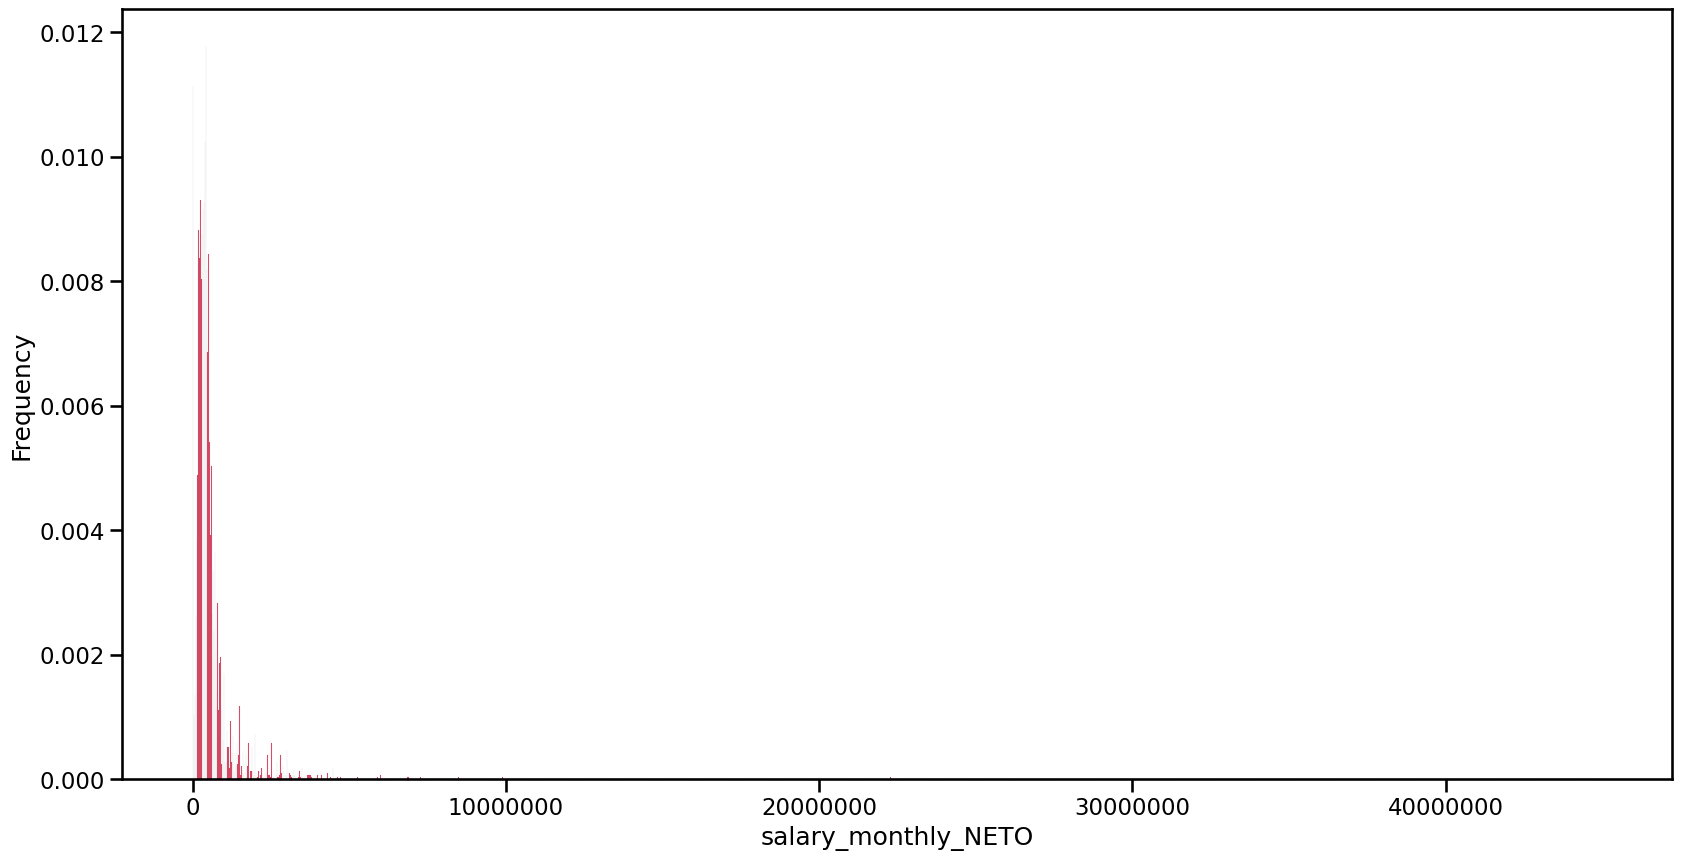

In [ ]:
fig = plt.figure(figsize=(20, 10))
seaborn.histplot(df[salary_col],bins = 1550,shrink = 0.5,stat = "frequency", color="crimson") #cambiar los bins=5,20 o 50 y ver...
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')
#plt.xlim((0,1000000))


(0.0, 1000000.0)

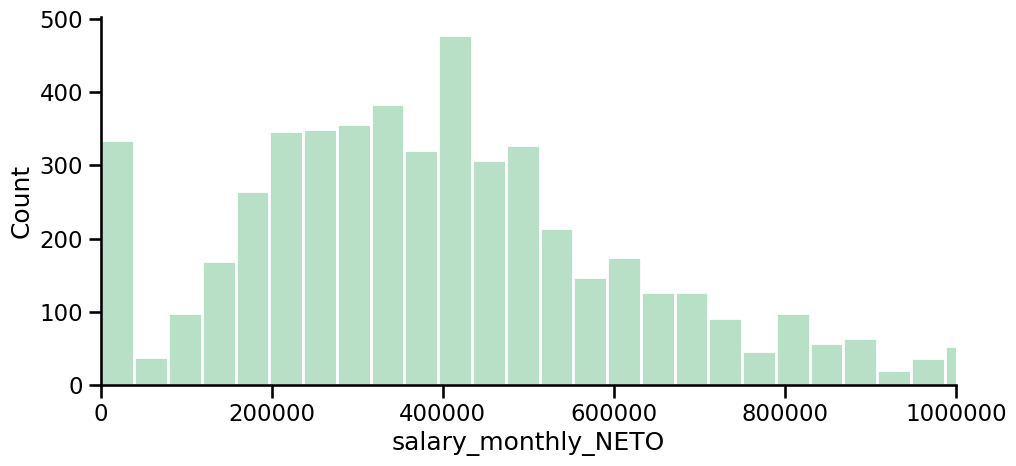

In [ ]:
seaborn.displot(df[salary_col], aspect=2,color = "#A0D6B4",edgecolor = "white",
             linewidth = 2)
## para evitar la notación científica en las etiquetas
plt.ticklabel_format(style='plain', axis='x')
plt.xlim((0,1000000))
#plt.savefig("filename.png")

### ¿Qué estamos viendo? Discutamos

Las visualizaciones simples son prácticas para conocer la forma de los datos rápidamente, porque condensan mucha información. Por ejemplo:
* El rango de valores tomados por la columna va desde 0 hasta aproximadamente 4M.
* La mayoría de los valores se condensa por debajo de los 800K, y pocos superan los 1000K.
* Los valores más frencuentes aparentan estar cerca de los 400K.
* Hay un pico de ocurrencias cerca del valor 0 que brinda poco detalle.


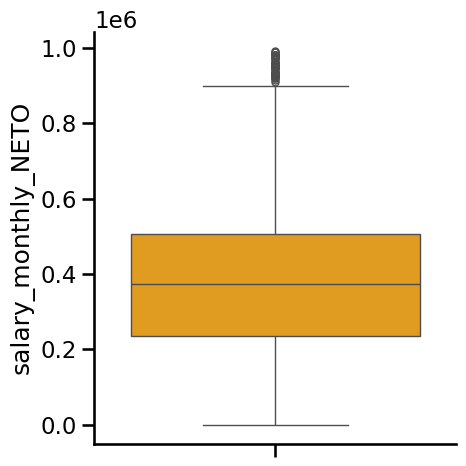

In [ ]:
seaborn.catplot(df.salary_monthly_NETO[df.salary_monthly_NETO < 1000000], kind="box",color="orange")

<Axes: xlabel='count', ylabel='work_province'>

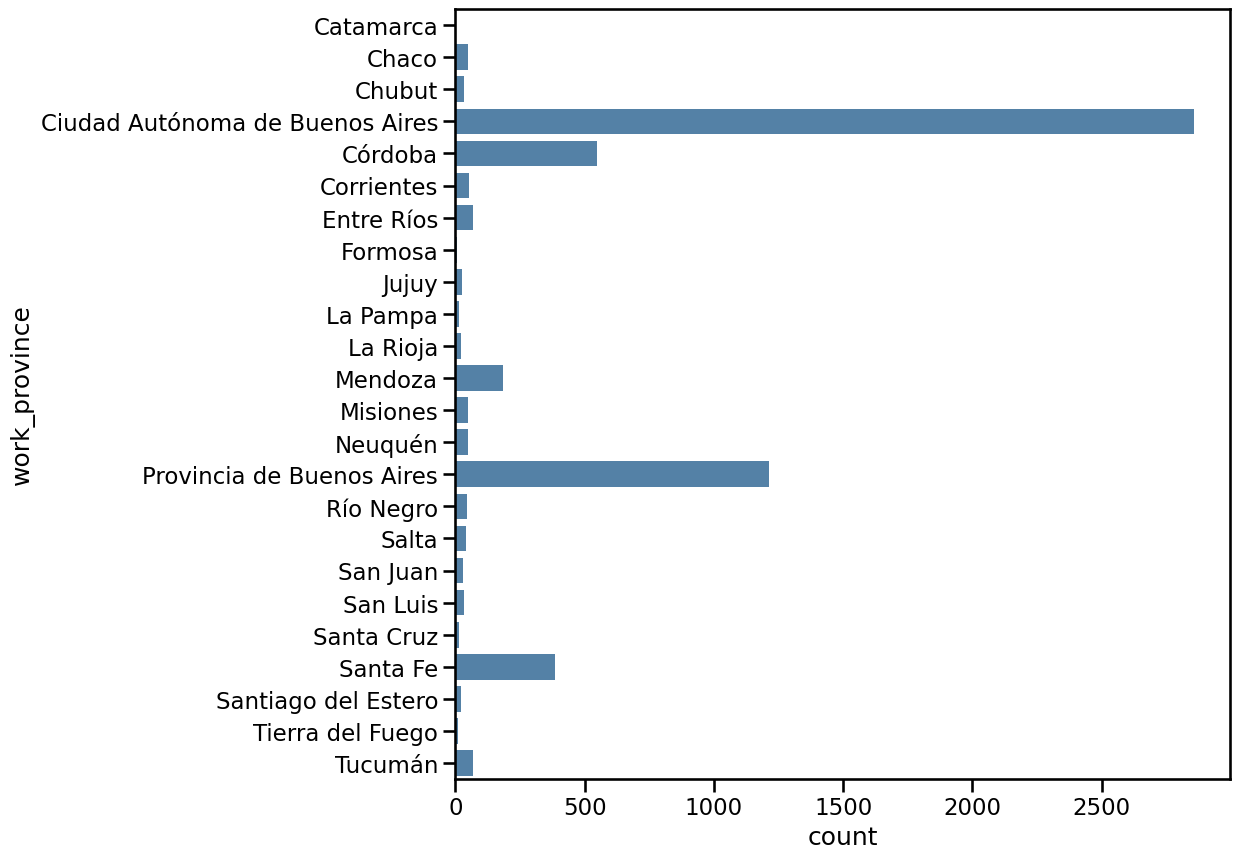

In [ ]:
#Conteos de Datos que no son numéricos, datos categóricos. Pueden ser ordinales o no ordinales.
fig = plt.figure(figsize=(10, 10))
seaborn.countplot(y=df.work_province, color='steelblue')

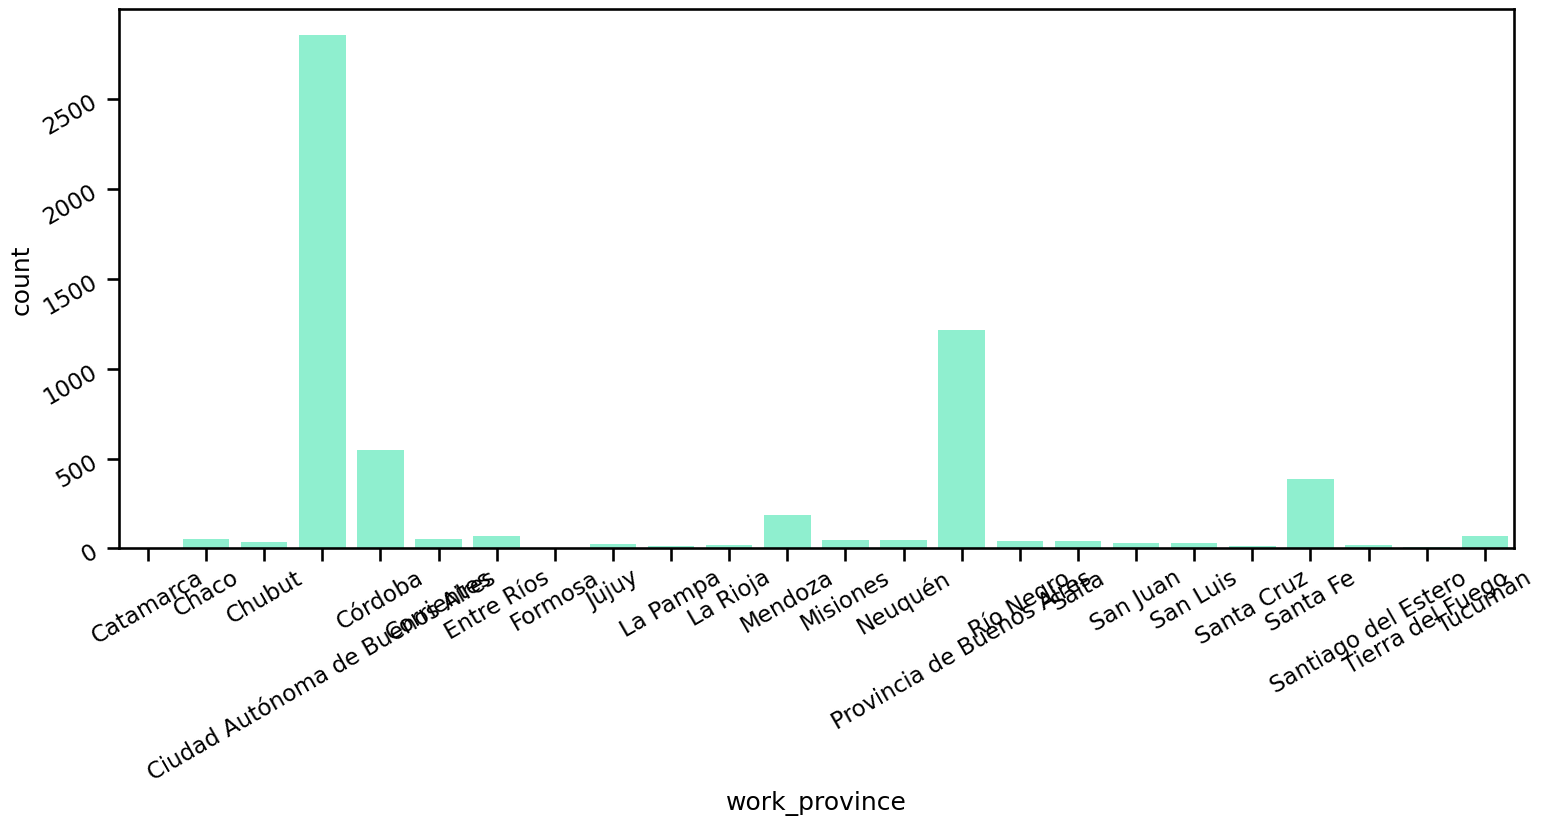

In [ ]:
plt.figure(figsize=(18,7))
seaborn.countplot(x=df.work_province, color ='aquamarine' )
plt.tick_params(labelrotation=30)

## Ejercicio: ¿Qué otro tipo de preguntas nos podemos hacer en este punto que no se responden con un histograma?


### Análisis, ¡fundamentado!

Para continuar el análisis, es necesario aplicar herramientas teóricas que nos brinda la Estadística y la Probabilidad.

## Datos y Variables Aleatorias

Podemos considerar que cada columna es un conjunto de datos, que se puede modelar con el concepto matemático de **variable aleatoria**, y que cada dato de esa columna es  una **realización u observación** de dicha variable.
Habrá datos (o intervalo) más "comunes" o repetidos y datos más atípicos...Ese concepto será modelado como la distribución o densidad de la variable aleatoria. Pero, ¿qué tipo tienen esas variables (o datos)?

### V.A. numéricas, para datos numéricos

El salario, la edad, los años de experiencia, son datos numéricos, serán modelados con variables aleatorias numéricas. Podemos clasificarlas en **continuas** o **discretas**, aunque esa distinción se vuelve difusa cuando trabajamos con datos computacionalmente. ¿Por qué?

* Datos que en teoría son continuos, se miden de manera discreta. Por ejemplo, los *años* de experiencia, la altura de una persona en *centímetros*.
* Datos que en teoría son continuos, se discretizan a fines prácticos. Por ejemplo, la edad, el salario en pesos argentinos.

Para analizar la distribución de datos continuos (o pseudo contínuos)se usan frecuentemente los histogramas, como en el caso anterior de los sueldos.

**¡Tip!** Antes de graficar, controlar el rango (ya que seaborn intentará crear miles de segmentos si el rango es muy grande) y remover los valores nulos.

In [ ]:
# Obtenemos el rango de valores observados de los salarios
df.profile_age.min(), df.profile_age.max()

(18, 455)

Ahora analizamos la edad de los encuestados

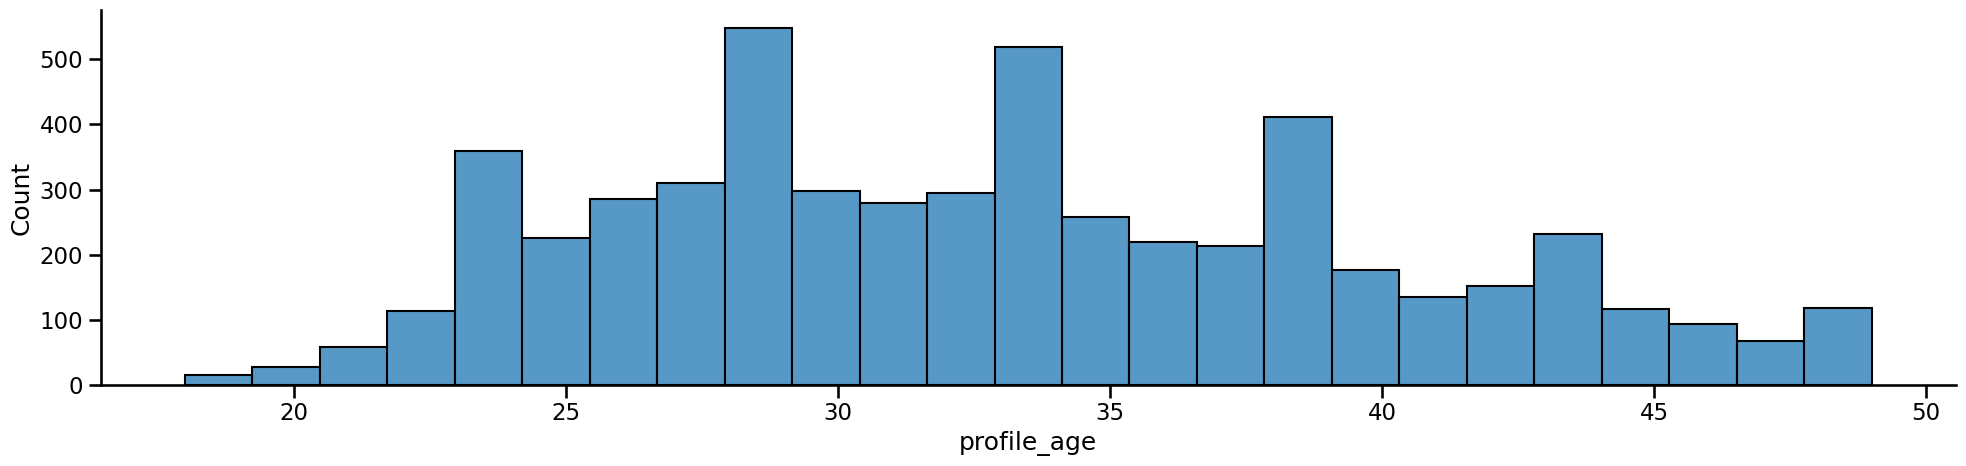

In [ ]:
seaborn.displot(df.profile_age[df.profile_age < 50].dropna(),
                 stat='count', aspect=4)

Sin embargo, los histogramas pueden ocultar información. ¿Por qué? Porque agrupan rangos de valores en intervalos inferidos automáticamente. Como resultado, la visualización varía con distintas longitudes de segmentos. Comparemos los siguientes histogramas.

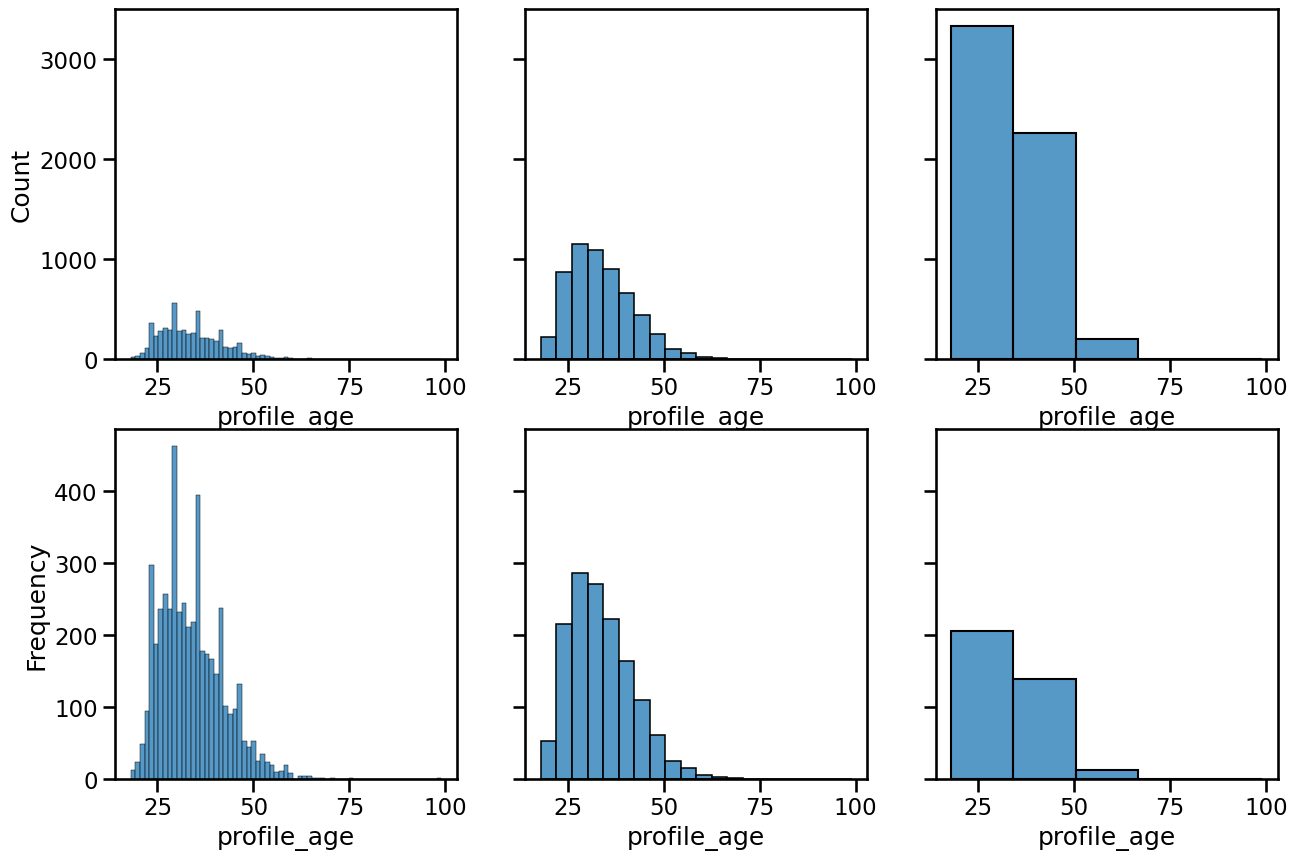

In [ ]:
# Un ejemplo más avanzado
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10), sharey='row')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,0],
                 stat='count')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,1],
                 bins=20, stat='count')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[0,2],
                 bins=5, stat='count')

seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,0],
                 stat='frequency')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,1],
                 bins=20, stat='frequency')
seaborn.histplot(df.profile_age[df.profile_age < 100].dropna(), ax=ax[1,2],
                 bins=5, stat='frequency')

fig.show()

Para variables discretas puede usarse un gráfico de línea, que permite visualizar el conteo de cada uno de los puntos en el rango observado.



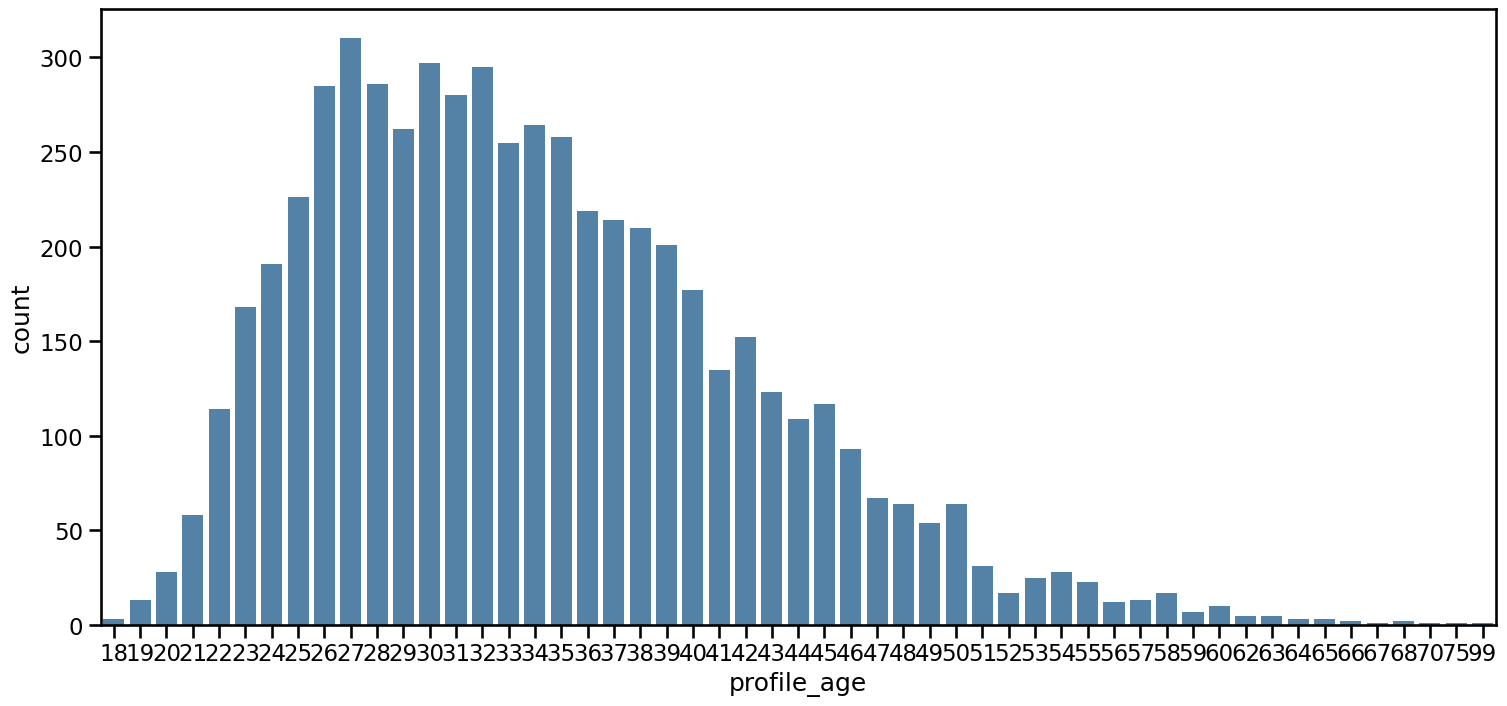

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,8))
seaborn.countplot(x=df.profile_age[df.profile_age < 100] , color='steelblue')
plt.show()

**¿Se puede usar un gráfico de líneas para la variable `salary_montly_NETO`? ¿Tiene sentido?**

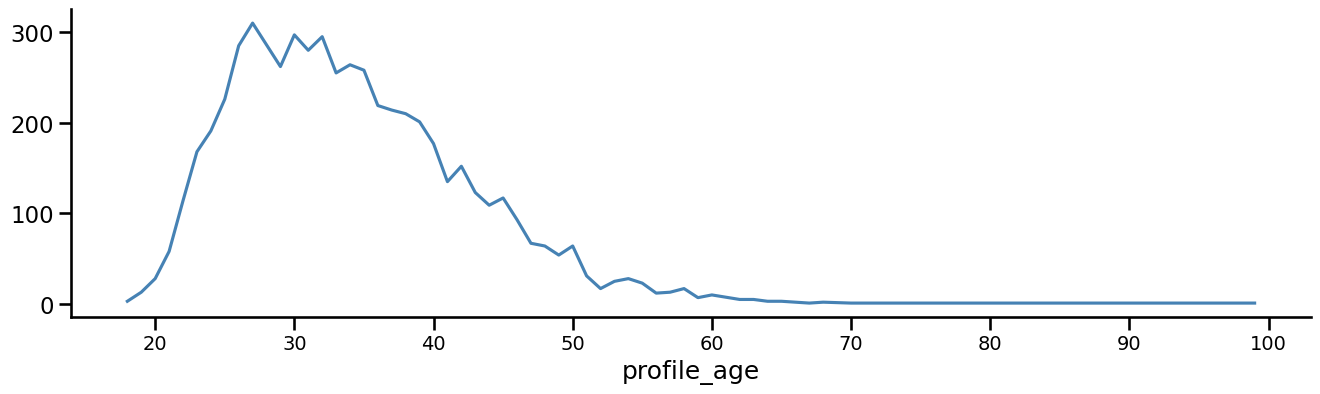

In [ ]:
fig = plt.figure(figsize=(16,4))
age_counts = df[df.profile_age < 100].profile_age.value_counts()
seaborn.lineplot(x=age_counts.index,y=age_counts.values, color='steelblue')
plt.xticks(fontsize=14)  # Achicamos la letra para que se vea mejor
seaborn.despine()

### V.A. categóricas, para datos categóricos

Las variables categóricas toman valores de un conjunto pre-definido, usualmente pero no necesariamente finito. Para visualizarlas, puede usarse un gráfico de barras, que representa cada valor observado con una columna, y el conteo de ese valor con la altura de la columna.

Las variables numéricas discretas, ¿son categóricas?

In [ ]:
df.profile_gender.unique()

array(['Varón Cis', 'Mujer Cis', 'Hombre', 'Prefiero no decir', 'normal',
       'Varon', 'Agénero', 'Masculino', 'Dolarsexual', '.', 'Queer',
       'Mujer Trans', 'No binarie',
       'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?',
       'no entiendo por que la hacen tan dificil. que es eso de cis? soy heterosexual.',
       'Hombre..... tipo normal', 'Cis', 'varon, no se que es varon cis',
       'Dejen de preguntar boludeces', 'Normal', 'que pelotudos eh',
       'hombre', 'Helicoptero de ataque apache', 'Varón Trans',
       'Varoo natural', 'Varón', 'Bigénero', 'Mujer', 'Transformer',
       'Fluido', 'masculino', 'Hombre, macho silencioso', 'varón',
       'no compliquemos lo simple', 'Agenero, presentación mujer cis',
       'Me considero perteneciente al genero de los que no se identifican con ningun genero',
       'Macho', 'Porque tantas opciones? Solo hay 2. Soy hombre.',
       'heterosexual', 'Machote', 'Puto', 'Gris', 'Heterosexual',
       'Hombre

In [ ]:
df.loc[:,'profile_g'] = df.profile_gender.replace({'Varón Cis': 'Varón cis','Mujer': 'Mujer cis','Mujer Cis': 'Mujer cis','Femenino': 'Mujer cis','mujer': 'Mujer cis','Mujer':'Mujer cis','Queer':'Diversidades','Varón Trans':'Diversidades','No binarie':'Diversidades','Mujer Trans':'Diversidades','Fluido':'Diversidades','Bigénero':'Diversidades','Gay':'Diversidades'}).fillna(False)

In [ ]:
df.profile_g.unique()

array(['Varón cis', 'Mujer cis', 'Hombre', 'Prefiero no decir', 'normal',
       'Varon', 'Agénero', 'Masculino', 'Dolarsexual', '.',
       'Diversidades',
       'BIEN MACHO Y PORONGUDO. QUE CLASE DE OPCIONES DE MIERDA SON ESTAS?',
       'no entiendo por que la hacen tan dificil. que es eso de cis? soy heterosexual.',
       'Hombre..... tipo normal', 'Cis', 'varon, no se que es varon cis',
       'Dejen de preguntar boludeces', 'Normal', 'que pelotudos eh',
       'hombre', 'Helicoptero de ataque apache', 'Varoo natural', 'Varón',
       'Transformer', 'masculino', 'Hombre, macho silencioso', 'varón',
       'no compliquemos lo simple', 'Agenero, presentación mujer cis',
       'Me considero perteneciente al genero de los que no se identifican con ningun genero',
       'Macho', 'Porque tantas opciones? Solo hay 2. Soy hombre.',
       'heterosexual', 'Machote', 'Puto', 'Gris', 'Heterosexual',
       'Hombre    (sexo cromosómico:  XY)',
       'yo que se que es todo eso masculino',

<Axes: xlabel='profile_g', ylabel='count'>

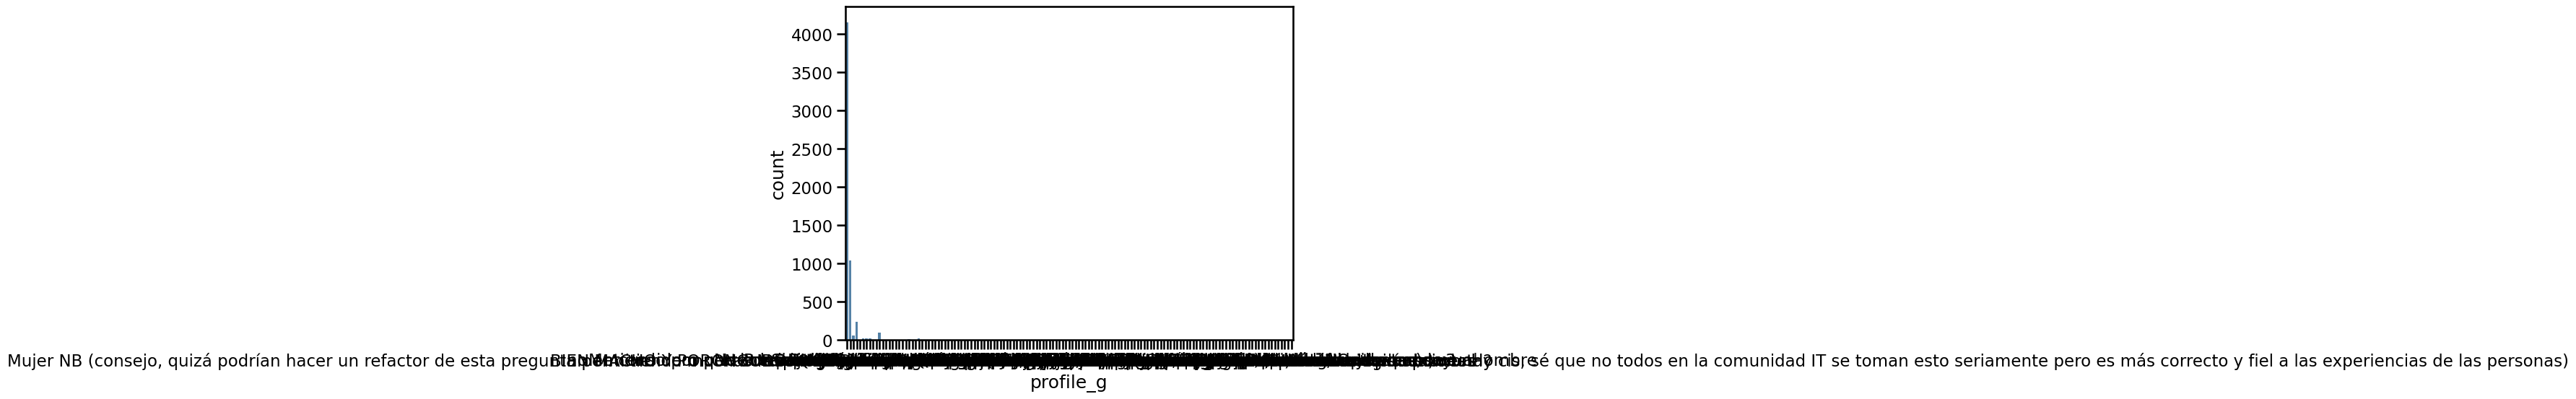

In [ ]:
fig = plt.figure(figsize=(8,6))
seaborn.countplot(x=df.profile_g, color='steelblue')

Los datos categóricos pueden ser *ordinales*, si existe un orden lógico entre sus valores.
En caso de que un orden exista, es adecuado incluirlo en el gráfico.

In [ ]:
df.profile_studies_level.unique()

array([nan, 'Maestría', 'Universitario', 'Terciario',
       'Posgrado/Especialización', 'Secundario', 'Doctorado',
       'Posdoctorado'], dtype=object)

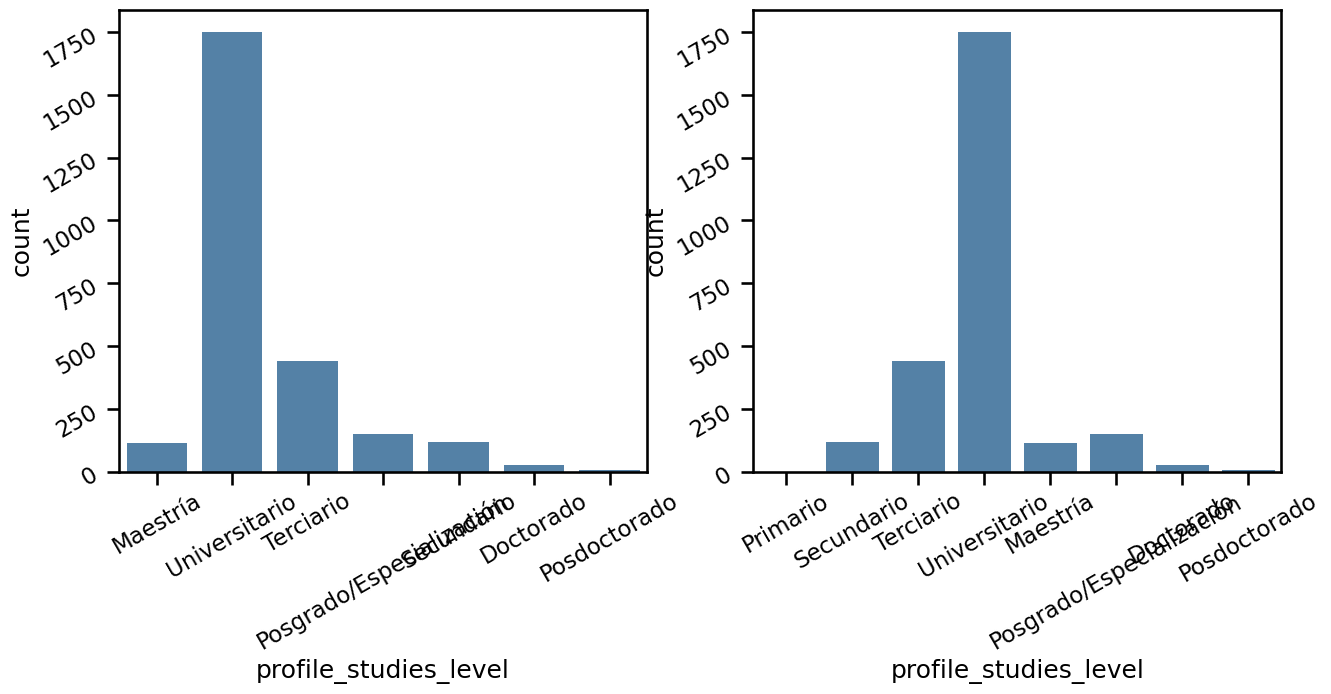

In [ ]:
sorted_studies_levels = ['Primario', 'Secundario', 'Terciario', 'Universitario',
                         'Maestría','Posgrado/Especialización', 'Doctorado', 'Posdoctorado']
fig, axes = plt.subplots(ncols=2, figsize=(15,6))
g = seaborn.countplot(x= df.profile_studies_level.dropna(), color='steelblue', ax=axes[0])
g = seaborn.countplot(x= df.profile_studies_level.dropna(), color='steelblue', ax=axes[1],
                  order=sorted_studies_levels)
for ax in axes:
  ax.tick_params(labelrotation=30)

volver a Filminas
Clase 1 - 2022 - Probabilidad

### Tipos de datos vs tipos de datos

Tenemos que distinguir dos conceptos con el mismo nombre y significado similar, pero que no son iguales:
 - **tipo de datos - variable aleatoria** es el tipo de valores que venimos hablando (numérico contínuo, numérico discreto, categórico ordinal y categórico no ordinal
 - **tipo de datos (computacional)** es un concepto de programación que indica en qué formato se representa la información. Cuando asignamos a una variable `age` *del programa de Python* una realización de una variable aleatoria conceptual `profile_age`, esa variable `age` también tiene un *tipo de Python*, por ejemplo `int` o `float`.


In [ ]:
age = df.profile_age.iloc[0]
type(age)

numpy.int64

*¡Importante!* Hay que tener en cuenta también los límites de la capacidad computacional al momento de representar entidades matemáticas.
* Los números reales siempre son "redondeados" a una representación racional.
* Los tipos básicos como `Int` sólo pueden representar números en un rango, por ejemplo `(-2^31, 2^31)`. Exceder el rango puede tener consecuencias inesperadas, como `integer overflow`.

¿Por qué es importante saberlo? Porque se pueden producir errores de redondeo u obtener resultados aproximados.

In [ ]:
print(type(3), type(3.44), type(1/3))  # 1/3 es un numero irracional
import numpy
print(numpy.iinfo('int64').min, numpy.iinfo('int64').max)
numpy.int64(numpy.iinfo('int64').max) + 1
# Traten de hacer numpy.int64(numpy.iinfo('int64').max + 1)

<class 'int'> <class 'float'> <class 'float'>
-9223372036854775808 9223372036854775807


<ipython-input-83-bec67c70ef3e>:4: RuntimeWarning: overflow encountered in scalar add
  numpy.int64(numpy.iinfo('int64').max) + 1


-9223372036854775808

Se puede acceder a los tipos de datos del DataFrame. El tipo `object` se utiliza para representar cualquier variable que no sea numérica, como por ejemplo los `str`.

In [ ]:
df.dtypes[:10]

work_country                 object
work_province                object
work_dedication              object
work_contract_type           object
salary_monthly_BRUTO        float64
salary_monthly_NETO         float64
salary_in_usd                object
salary_last_dollar_value     object
salary_has_bonus             object
salary_bonus_tied_to         object
dtype: object

Hay que tener en cuenta que las librerías de gráficos nos permitirán crear las visualizaciones que querramos, mientras los tipos de datos sean los adecuados.

Por ejemplo, podemos hacer un histograma con la variable `profile_open_source_contributions` si la transformamos a tipo `bool` (que se representa internamente como un tipo entero). Sin embargo, esto no tiene ningún sentido.

In [ ]:
df.loc[:,'salary_in_usd_bool'] = \
  df.salary_in_usd.replace({'Cobro todo el salario en dólares': True,'Mi sueldo está dolarizado (pero cobro en moneda local)': True,'Cobro parte del salario en dólares': True}).fillna(False)
print(df.salary_in_usd.unique(), df.salary_in_usd_bool.unique())

[nan 'Cobro todo el salario en dólares'
 'Mi sueldo está dolarizado (pero cobro en moneda local)'
 'Cobro parte del salario en dólares'] [False  True]


<Axes: xlabel='salary_in_usd_bool', ylabel='Count'>

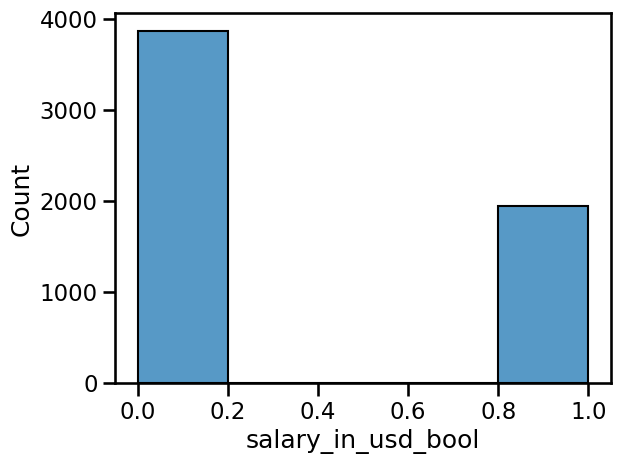

In [ ]:
seaborn.histplot(df.salary_in_usd_bool, bins=5)

También podemos graficar la frecuencia de una variable categórica utilizando un gráfico de líneas. **¿Por qué esta visualización no es correcta?**

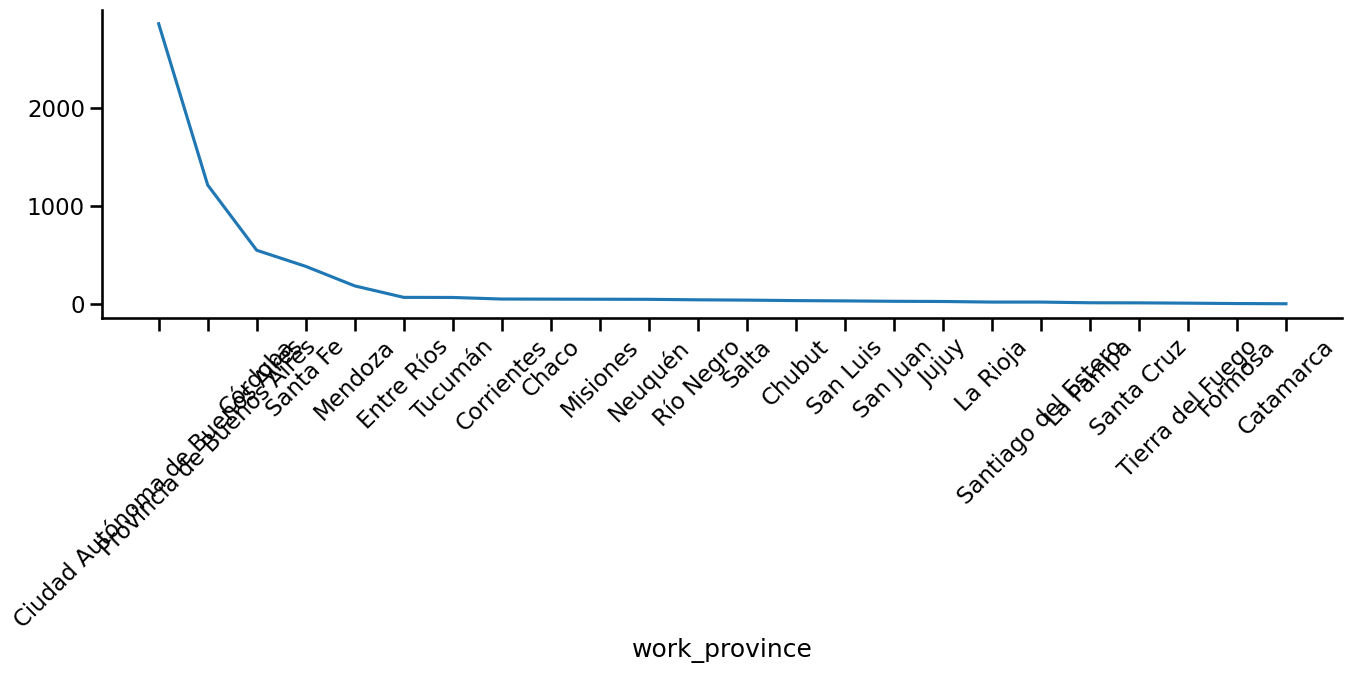

In [ ]:
count_by_province = df.work_province.value_counts()
fig = plt.figure(figsize=(16, 4))
seaborn.lineplot(x=count_by_province.index, y=count_by_province.values)
plt.xticks(rotation=45)
seaborn.despine()

Ir a filminas

# Análisis del impacto de los años de experiencia

Ahora que ya sabemos aproximadamente la forma de nuestros datos, podemos pasar a realizar otra pregunta (otra iteración del proceso de análisis):

**¿Tener más años de experiencia significa que se cobra más?**

Para responder a esta pregunta, analizamos la probabilidad de que un programador tenga un salario mensual mayor que el promedio, cuando tiene una experiencia mayor que 5 años.



## Medida de probabilidad

En el teórico vimos que si cada una de nuestros eventos es independiente e idénticamente distribuido, es decir, que $P(\{\omega_i\})=1/k$, entonces la probabilidad de un conjunto $A \subset \Omega$ es la proporción de $A$, donde .


$$P(\{\omega_i\})=1/k \implies P(A)=|A|/|\Omega|=|A|/k$$


En este problema en particular, $\Omega$ son todas las respuestas del dataset, cada $a_i$ es una variable que representa una respuesta, y el conjunto $A$ son las respuestas (filas) en la que la columna `salary_col` tiene un valor mayor que el promedio


In [ ]:
avg_salary = df[salary_col].mean()  #salario promedio
avg_salary

567173.1519830937

In [ ]:
prob_above_avg = len(df[df[salary_col] >= avg_salary]) / len(df) #consideramos: "cobrar más"<-> cobrar más que el promedio
prob_above_avg

0.26132644272179156

* ¿Por qué podemos usar la teoría de la probabilidad?
* ¿Por qué calculamos una probabilidad con esta fórmula?
* ¿Cómo podemos interpretar esta probabilidad?

## Probabilidad condicional

Ahora podemos pasar a hablar de la probabilidad condicional entre los dos eventos. La definimos como

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Esto es equivalente a:

$$P(A|B) = \frac{|A \cap B|}{|B|}$$




## Ejercicio

Responder: **¿Si uno tiene más de 5 años de experiencia, la probabilidad de cobrar más que el promedio aumenta? ¿Estos eventos, son independientes?**

In [ ]:
is_above_avg = df[salary_col ]> avg_salary #lista de booleanos
exp_greater_5 = df.profile_years_experience > 5  #lista debooleanos

intersection_count = len(df[is_above_avg & exp_greater_5])
exp_greater_5_count=len(df[ exp_greater_5])

prob_cond_above_avg_dada_exp=len(df[is_above_avg & exp_greater_5])/len(df[ exp_greater_5])

prob_cond_above_avg_dada_exp

0.40958442530887307

In [ ]:
prob_above_avg

0.26132644272179156

Completar...

Son iguales P(A|B) y P(A)?

Son independientes A y B?